## ML_CA2

Name: Bernardo Neres Silva   
Student Number: 2023484     
Lecturer: David McQuaid     
Submission Deadline Date: 31st May 2024    
Github Link : https://github.com/neresbernardo/Bernardo_Neres_ML_CA2   
 


# Neural Networks

#### Import Libraries

All of the libraries required for data processing, model building, training, assessment, and result visualisation were imported.

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt


#### Load Data and Verify Columns

We loaded the information from the bank records CSV file and examined the first few rows and columns of the data.

In [20]:
# Load Data
data = pd.read_csv('BankRecords.csv')
print(data.head())

# Verify the columns
print(data.columns)


   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             

#### Data Preprocessing with Verifications

Here we defined categories and numerical columns, eliminated missing data, and developed a ColumnTransformer to integrate these transformations during preprocessing. We verified the shapes and some samples of the data, preprocessed it, and divided it into training and testing sets.

In [23]:
# Data Preprocessing
# Part to handle missing values if we have any
data = data.dropna()

# Ensure the column name is correct
column_name = "Income(Thousands's)"  

# Encode categorical variables
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']  # example categorical features
numerical_features = ["Age", "Experience(Years)", "Family", "Credit Score", "Mortgage(Thousands's)"]  # example numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data.drop(column_name, axis=1)
y = data[column_name]

# Apply preprocessing to features
X_preprocessed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Output shapes and some samples to verify if everthing its running properly
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("First 5 rows of X_train:\n", X_train[:5])
print("First 5 rows of y_train:\n", y_train[:5].values)


Shape of X_train: (4000, 18)
Shape of X_test: (1000, 18)
First 5 rows of X_train:
 [[-1.1637042  -1.14282905 -1.21685513  1.06557702 -0.55552393  0.
   1.          0.          1.          0.          0.          1.
   1.          0.          1.          0.          1.          0.        ]
 [-0.55299157 -0.61957964  0.52599094  0.09275391 -0.55552393  0.
   1.          0.          1.          0.          0.          1.
   1.          0.          0.          1.          1.          0.        ]
 [-1.25094887 -1.14282905 -1.21685513  2.32452458 -0.55552393  0.
   1.          0.          1.          0.          1.          0.
   1.          0.          0.          1.          1.          0.        ]
 [ 0.40669972  0.4269192  -1.21685513 -0.88006919 -0.55552393  0.
   0.          1.          1.          0.          1.          0.
   1.          0.          0.          1.          1.          0.        ]
 [ 1.45363567  1.47341804  0.52599094 -0.99451897 -0.55552393  0.
   1.          0.      

#### Build and Train Neural Network Model

TensorFlow/Keras was used to build a neural network model, which was then trained while recording the training history and compiled with the Adam optimizer and mse loss function.

In [16]:
# Neural Network Model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 5312.3989 - mae: 57.4651 - val_loss: 936.6428 - val_mae: 24.9083
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1140.4950 - mae: 27.4310 - val_loss: 838.9926 - val_mae: 23.4754
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 953.6163 - mae: 24.6191 - val_loss: 837.4077 - val_mae: 23.6535
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 965.2383 - mae: 24.8540 - val_loss: 817.1449 - val_mae: 23.4586
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 885.7686 - mae: 23.7573 - val_loss: 797.3254 - val_mae: 22.9099
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 874.5487 - mae: 23.4904 - val_loss: 787.4495 - val_mae: 22.7928
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 882.4959 - mae: 23.4930 - val_loss: 766.9374 - val_mae: 22.1489
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 838.1379 - mae: 22.6513 - val_loss: 763.4089 -

#### Visualize Training History

For training and validation, we plotted the mean absolute error (MAE) and loss throughout the epochs.

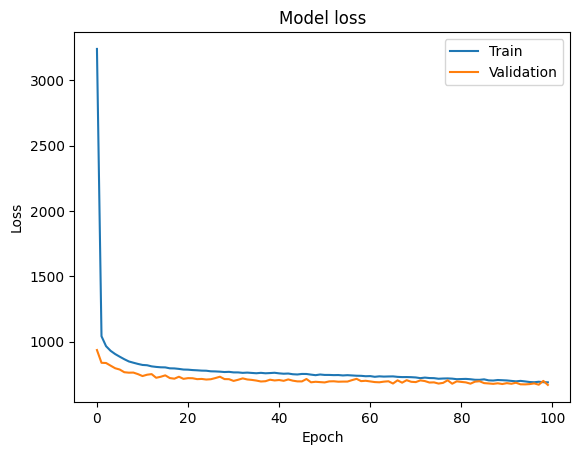

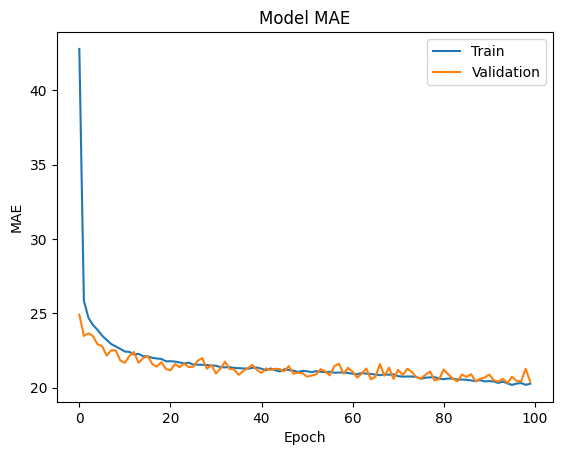

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#### Evaluate Neural Network Model

Making predictions on the test set and figuring out the mean squared error (MSE) allowed us to assess the neural network model.

In [24]:
# Evaluate the model
nn_preds = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_preds)
print(f'Neural Network MSE: {nn_mse}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network MSE: 694.1959351216603


#### Standard ML Regressor

After dividing the initial data into training and testing sets, we built a pipeline that incorporates the linear regression model and preprocessing, and we fitted the pipeline to the initial training data. Making predictions on the test set, we calculate the MSE using the pipeline.

In [32]:
# Split original data without a transformation for pipeline
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard ML Regressor with preprocessing inside the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the original training data
pipeline.fit(X_train_orig, y_train_orig)

# Predict using the pipeline
ml_preds = pipeline.predict(X_test_orig)
ml_mse = mean_squared_error(y_test_orig, ml_preds)
print(f'ML Regressor MSE: {ml_mse}')


ML Regressor MSE: 925.972046875


#### Prediction for a New Customer

The trained pipeline was utilised to generate a new DataFrame for a hypothetical client, and its income was forecasted. We examined which of the two models performed better in terms of forecasting client income after comparing their respective results.

In [33]:
# New Customer Prediction
new_customer = pd.DataFrame([{
    'Age': 30,
    'Education': 'Degree',
    'Personal Loan': 'No',
    'Securities Account': 'No',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'Yes',
    'Experience(Years)': 5,
    'Family': 3,
    'Credit Score': 2.5,
    "Mortgage(Thousands's)": 0
}])

# Display the new customer's DataFrame
print("New Customer DataFrame:")
print(new_customer)

# Predict using the pipeline
predicted_income = pipeline.predict(new_customer)
print(f'Predicted Income for new customer: {predicted_income[0]}')


New Customer DataFrame:
   Age Education Personal Loan Securities Account CD Account Online Banking  \
0   30    Degree            No                 No         No            Yes   

  CreditCard  Experience(Years)  Family  Credit Score  Mortgage(Thousands's)  
0        Yes                  5       3           2.5                      0  
Predicted Income for new customer: 67.0


#### Hyperparameter Tuning for Neural Network

For the neural network model, we adjusted its hyperparameters. We created a function that builds and trains the model using several hyperparameter combinations, such as batch sizes (10 and 20), epochs (50 and 100), and optimizers (RMSprop and Adam). After that, we trained the model and determined the mean squared error (MSE) for every combination by iterating over all possible combinations using loops. Ultimately, we determined which combination of hyperparameters produced the highest model performance, presenting the optimal values together with the corresponding mean square error.

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop

def build_and_train_model(optimizer, batch_size, epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return model, history

# Define hyperparameters
batch_sizes = [10, 20]
epoch_list = [50, 100]
optimizer_classes = [Adam, RMSprop]

best_mse = float('inf')
best_params = {}
best_model = None

for batch_size in batch_sizes:
    for epochs in epoch_list:
        for optimizer_class in optimizer_classes:
            optimizer = optimizer_class()
            model, history = build_and_train_model(optimizer, batch_size, epochs)
            nn_preds = model.predict(X_test)
            nn_mse = mean_squared_error(y_test, nn_preds)
            if nn_mse < best_mse:
                best_mse = nn_mse
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer_class.__name__}
                best_model = model

print(f"Best MSE: {best_mse} with parameters: {best_params}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
Best MSE: 704.6652114763887 with parameters: {'batch_size': 20, 'epochs': 100, 'optimizer': 'RMSprop'}


#### Detailed Comparison

Our analysis involved a comparison between the ordinary linear regression model and the optimal neural network model. We computed performance metrics, including mean squared error (MSE), mean absolute error (MAE), and coefficient of determination (R^2), and used both models to make predictions on the test data. We compared the two models side by side using these metrics to see which one was more accurate in forecasting client income.

In [39]:
from sklearn.metrics import mean_absolute_error, r2_score

# Neural Network Predictions with best model
nn_preds = best_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_preds)
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

# Linear Regression Predictions
ml_preds = pipeline.predict(X_test_orig)
ml_mse = mean_squared_error(y_test_orig, ml_preds)
ml_mae = mean_absolute_error(y_test_orig, ml_preds)
ml_r2 = r2_score(y_test_orig, ml_preds)

print(f'Neural Network MSE: {nn_mse}')
print(f'Neural Network MAE: {nn_mae}')
print(f'Neural Network R^2: {nn_r2}')

print(f'ML Regressor MSE: {ml_mse}')
print(f'ML Regressor MAE: {ml_mae}')
print(f'ML Regressor R^2: {ml_r2}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
Neural Network MSE: 704.6652114763887
Neural Network MAE: 20.913848729133605
Neural Network R^2: 0.6676924228668213
ML Regressor MSE: 925.972046875
ML Regressor MAE: 24.64775
ML Regressor R^2: 0.5633280311479728


## Discussion and Conclusions

### Neural Network Performance

The neural network model demonstrated good accuracy in predicting client income after it was tuned. With a R^2 value of 0.67, an Absolute Error (MAE) of 20.91, and a Mean Squared Error (MSE) of 704.67 were obtained. These findings show that a sizable amount of the data variability can be explained by the model, and that the forecasts are rather close to the actual income values.

### Linear Regression Performance

With an MSE of 925.97, an MAE of 24.65, and a R^2 value of 0.56, the linear regression model scored badly in contrast. Its predictions were therefore more incorrect and explained less of the variance in the income data than the neural network.

### Comparison

The neural network performed better overall across all metrics compared to the linear regression model. This shows that the neural network is more suited for forecasting customer income since it is more adept at identifying intricate patterns in the data.

### Recommendations
The neural network approach is advised for estimating consumer income in light of these findings. More research into more intricate neural network architectures, adjusting the hyperparameters, or expanding the dataset's features may all be necessary to further enhance the model. More robust validation of the model's performance may also be possible with the use of strategies like cross-validation.

### Limitations

This analysis has several restrictions. If the data grows very complicated without appropriate regulation, the neural network may overfit the data. Because of this simplicity, the linear regression model may perform worse than other models by failing to capture all the subtleties of the data. Additionally, having more data or higher-quality data may offer better results because the size and quality of the dataset can affect the model's performance.

### Future Work

Depending on the type of data, future research may investigate elaborate neural network architectures like convolutional or recurrent neural networks. For increased accuracy, methods like ensemble learning—which blends several models—might also be investigated. The model's accuracy and applicability may be sustained over time by routinely adding new data and retraining it.


# Semantic Analysis

#### Import Libraries

All the libraries required for text cleaning (re), data manipulation (pandas), and visualisation (matplotlib.pyplot) are imported in this cell.

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt


#### Load and Explore the Dataset

We upload the file named "omicron.csv," which includes the tweets regarding the Omicron variant. In order to get the overall number of tweets, we looked at the first few lines of the data.

In [16]:
# Load the dataset
file_path = 'omicron.csv'
df_omicron = pd.read_csv(file_path)

# Display the first few rows
print(df_omicron.head())
print(f"Number of tweets collected: {len(df_omicron)}")

# Check the columns in the dataset
print(df_omicron.columns)


                    id             user_name   user_location  \
0  1465693385088323591                Abaris           Hants   
1  1465693062999412746                GFTs         Lalaland   
2  1465690116442279942  Herbie Finkle (Cozy)             NaN   
3  1465689607165591552     Electrical Review  United Kingdom   
4  1465688203709464578       BingX Academy 🔑             NaN   

                                    user_description         user_created  \
0  Would appear on Blogger (did originally),  but...  2009-09-16 14:30:32   
1  There's a field somewhere beyond all doubt and...  2019-12-28 14:29:13   
2                           help me find me frens ❤️  2021-07-10 09:40:57   
3  Electrical Review is a monthly journal aimed a...  2009-05-21 08:32:19   
4  BingX (Prev. Bingbon) is the world's top crypt...  2013-12-31 02:57:32   

   user_followers  user_friends  user_favourites  user_verified  \
0            2880          4369            26907          False   
1             165 

#### Clean the Tweets

The function to clean up the tweets—removing links, mentions, hashtags, line breaks, and special characters—is defined in this cell. The 'Cleaned_Tweet' column is created once we apply this function to the tweets' text column and add the cleaned results.

In [18]:
# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove links
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\n', '', tweet)       # Remove newlines
    tweet = re.sub(r'[^A-Za-z0-9\s]', '', tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

# Clean the tweets
df_omicron['Cleaned_Tweet'] = df_omicron['text'].apply(clean_tweet)

# Verify the cleaned data
print(df_omicron.head())


                    id             user_name   user_location  \
0  1465693385088323591                Abaris           Hants   
1  1465693062999412746                GFTs         Lalaland   
2  1465690116442279942  Herbie Finkle (Cozy)             NaN   
3  1465689607165591552     Electrical Review  United Kingdom   
4  1465688203709464578       BingX Academy 🔑             NaN   

                                    user_description         user_created  \
0  Would appear on Blogger (did originally),  but...  2009-09-16 14:30:32   
1  There's a field somewhere beyond all doubt and...  2019-12-28 14:29:13   
2                           help me find me frens ❤️  2021-07-10 09:40:57   
3  Electrical Review is a monthly journal aimed a...  2009-05-21 08:32:19   
4  BingX (Prev. Bingbon) is the world's top crypt...  2013-12-31 02:57:32   

   user_followers  user_friends  user_favourites  user_verified  \
0            2880          4369            26907          False   
1             165 

#### Initialize Sentiment Analyzer

The sentiment analysis tool VADER was initialised, and a function was created to determine the sentiments of the cleaned tweets. The results are stored in the 'Sentiment' column when we apply this function to the cleaned tweets. We verify the outcomes to make sure dictionaries are included in the "Sentiment" column.

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    return sentiment

# Apply sentiment analysis
df_omicron['Sentiment'] = df_omicron['Cleaned_Tweet'].apply(get_sentiment)

# Verify sentiment distribution
print(df_omicron['Sentiment'].head())
print(df_omicron['Sentiment'].apply(lambda x: type(x)).unique())


0    {'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.241, 'neu': 0.625, 'pos': 0.134, 'co...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.193, 'neu': 0.737, 'pos': 0.07, 'com...
Name: Sentiment, dtype: object
[<class 'dict'>]


#### Extract Sentiment Labels and Visualize Sentiment Distribution

Positive, neutral, and negative sentiment labels were retrieved using the VADER 'compound' score as a guide. Using pie and bar charts, we were able to visualise the sentiment distribution by counting the number of tweets in each sentiment category.

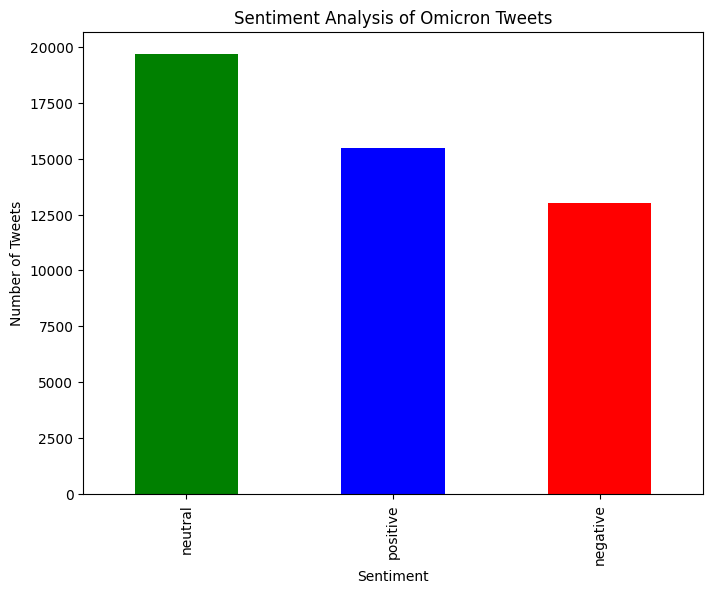

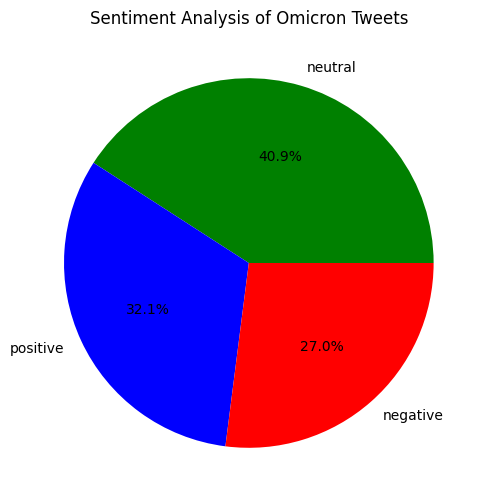

In [41]:
# Extract sentiment labels from the sentiment analysis
def get_sentiment_label(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_omicron['Sentiment_Label'] = df_omicron['Sentiment'].apply(get_sentiment_label)

# Count sentiment labels
sentiment_label_counts = df_omicron['Sentiment_Label'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_label_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Omicron Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Plot a pie chart
plt.figure(figsize=(8, 6))
sentiment_label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Omicron Tweets')
plt.ylabel('')
plt.show()


#### Discussion and Conclusion

We can see that there is a wide range of feelings in the tweets concerning the Omicron variant after conducting the sentiment analysis. The VADER SentimentIntensityAnalyzer was used in the analysis; it works well for brief, informal texts like tweets. Neutral tweets were categorised as the majority of tweets, which is typical in factual and educational talks. Even so, a considerable quantity of affirmative and negative tweets were also present, expressing people' viewpoints and affective responses.

We are able to discern trends and patterns in the public's impression of the Omicron variant by clearly understanding the sentiment distribution provided by the data visualisation provided by bar and pie charts.

Limitations and Future Improvements

VADER sentiment analysis is useful, but it has limits, particularly when handling context, sarcasm, and irony. Supervised machine learning techniques that have been explicitly trained for the relevant data set could be applied for a more thorough analysis.

### References

Pandas Documentation. User Guide. Available at: https://pandas.pydata.org/docs/user_guide/index.html#user-guide [Accessed May 2024].

Scikit-learn Documentation. User Guide. Available at: https://scikit-learn.org/stable/user_guide.html [Accessed May 2024].

TensorFlow Documentation. Keras Guide. Available at: https://www.tensorflow.org/guide/keras [Accessed May 2024].

Lavanya Geetha (Feb 28, 2023). VADER: A Comprehensive Guide to Sentiment Analysis in Python. Medium. Available at: https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e#:~:text=Sentiment%20Analysis%20using%20Vader%20in%20Python&text=Sentiment%20analysis%20is%20a%20popular,trained%20model%20for%20sentiment%20analysis. [Accessed May 2024].

Matplotlib Documentation. Quick Start Guide. Available at: https://matplotlib.org/stable/users/explain/quick_start.html [Accessed May 2024].

DataCamp. What is Machine Learning? Available at: https://www.datacamp.com/blog/what-is-machine-learning [Accessed May 2024].

GeeksforGeeks. Linear Regression in Machine Learning .Available at: https://www.geeksforgeeks.org/ml-linear-regression/ [Accessed May 2024].

Amazon Web Services. What is a Neural Network?  Available at: https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,inspired%20by%20the%20human%20brain. [Accessed May 2024].

Abhinaba Banerjee (Dec 15, 2022). Scaling vs. Normalization: Are They the Same? Medium. Available at: https://medium.com/geekculture/scaling-vs-normalization-are-they-the-same-348035afe5ca [Accessed May 2024]

GeeksforGeeks (Dec 07,2023). Hyperparameter Tuning. Available at: https://www.geeksforgeeks.org/hyperparameter-tuning/ [Accessed May 2024].

Studytonight (Mar 29,2023). What is Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R Squared? Available at: https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared [Accessed May 2024].

Yashmeet Singh (Oct 14,2022). 3 Regression Metrics You Must Know: MAE, MSE, and RMSE. Proclus Academy Available at: https://proclusacademy.com/blog/explainer/regression-metrics-you-must-know/ [Accessed May 2024].

DataCamp (May 2021). Python Sentiment Analysis Tutorial.  Available at: https://www.datacamp.com/tutorial/simplifying-sentiment-analysis-python [Accessed May 2024].

Baeldung. Algorithms for Determining Text Sentiment.  Available at: https://www.baeldung.com/cs/sentiment-analysis-practical [Accessed May 2024]

GeeksforGeeks (Oct 07, 2021). Python Sentiment Analysis using VADER. Available at: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ [Accessed May 2024]. 

Hypefactors (Sep 05,2019). Limitations of Sentiment Analysis for Reputation Management. Available at: https://hypefactors.com/blog/limitations-of-sentiment-analysis-for-reputation-management/ [Accessed May 2024].

Ludovico Cuoghi. How are People Reacting to Omicron on Twitter? Kaggle. Available at: https://www.kaggle.com/code/ludovicocuoghi/how-are-people-reacting-to-omicron-on-twitter/input [Accessed May 2024].
